In [1]:
import pandas as pd
import sys
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import warnings
from numba.errors import NumbaPerformanceWarning
from mpl_toolkits import mplot3d
%matplotlib inline
#import hdbscan

# 0. Load Data

Choose the dataset we want to cluster

In [2]:
# All users, no distinction per transaction
compressed_data = pd.read_csv('Data/202001_data_compressed1.csv')
compressed_data = compressed_data.rename(columns={'Unnamed: 0' : 'ID'})
# rent users
df_rent = pd.read_csv('Data/202001_data_compressed_data_rent.csv', index_col='Marketing_Cloud_Visitor_ID')
# sale users
df_sale = pd.read_csv('Data/202001_data_compressed_data_sale.csv', index_col='Marketing_Cloud_Visitor_ID')

NameError: name 'fig' is not defined

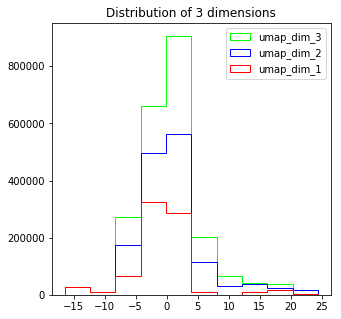

In [3]:
n_bins=10
x = compressed_data.drop(columns={'ID'}).transpose()
colors = ['red', 'blue', 'lime']
plt.figure(figsize=(5, 5))
plt.hist(x, n_bins, histtype='step', stacked=True, fill=False, color=colors, label=x.index)
plt.title('Distribution of 3 dimensions')
plt.legend()
fig.tight_layout()
plt.show()

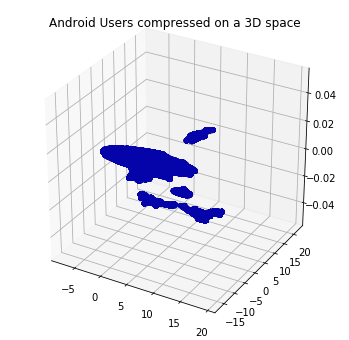

In [9]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(compressed_data['umap_dim_3'], 
             compressed_data['umap_dim_2'], 
             compressed_data['umap_dim_1'], 
             c='#0504aa') 
             s=15, 
             alpha=0.002)
plt.title('Android Users compressed on a 3D space')
plt.show()

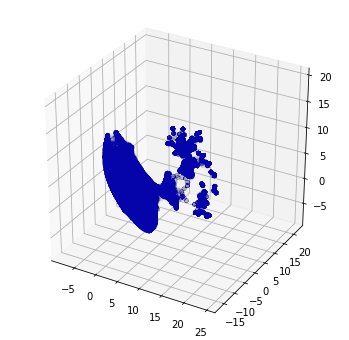

In [8]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(compressed_data['umap_dim_2'], 
             compressed_data['umap_dim_1'], 
             compressed_data['umap_dim_3'], 
             c='#0504aa', 
             s=20, alpha=0.002)
plt.show()
plt.title('Another rotation of the same 3D space')

# 1. HDBScan

In [267]:
# Cluster rent data
clusterer = hdbscan.HDBSCAN(min_cluster_size=2000, 
                            min_samples=1000, 
                            leaf_size=10,
                            core_dist_n_jobs=2, 
                            metric='euclidean').fit(df_rent)
print('Clusters found (including noise): ' + str(len(np.unique(clusterer.labels_))))
df_rent['label'] = clusterer.labels_.copy()
df_rent['label_probability'] = clusterer.probabilities_.copy()

Clusters found (including noise): 4


In [327]:
# Cluster sale data
clusterer = hdbscan.HDBSCAN(min_cluster_size=2000, 
                            min_samples=1000, 
                            leaf_size=5,
                            core_dist_n_jobs=2, 
                            metric='euclidean').fit(df_sale)
print('Clusters found (including noise): ' + str(len(np.unique(clusterer.labels_))))
df_sale['label'] = clusterer.labels_.copy()
df_sale['label_probability'] = clusterer.probabilities_.copy()

Clusters found (including noise): 8


In [329]:
df_aux = df_compressed.copy()

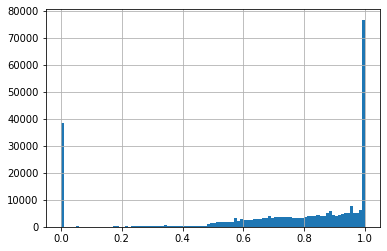

In [330]:
df_aux[df_aux.label_probability>=0].label_probability.hist(bins=100)

In [331]:
treshold = 0.95
print('With confidence level: ' + str(treshold))
m = df_aux[df_aux.label_probability>=treshold].shape[0]
n = round(m/df_aux.shape[0], 3)*100                                                         
print('We can cluster ' + str(n) + '% of users')

With confidence level: 0.95
We can cluster 33.2% of users


In [332]:
df_aux = df_aux[df_aux.label_probability>=treshold]
print('Now dataframe has shape:')
print(df_aux.shape)

Now dataframe has shape:
(101199, 5)


7clusters


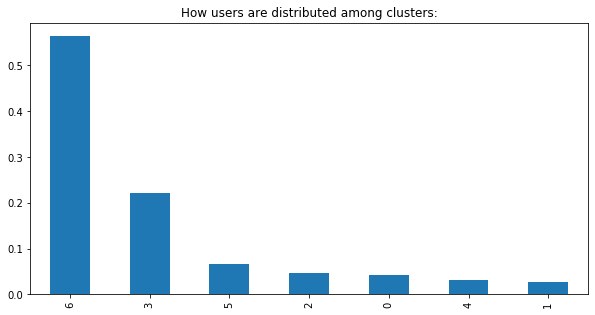

Clusters distribution


In [333]:
print(str(df_aux.label.unique().shape[0]) + 'clusters')
plt.figure(figsize=(10, 5))
plt.title('How users are distributed among clusters:')
pd.value_counts(df_aux['label'], normalize=True).plot.bar()
plt.show()
print('Clusters distribution')

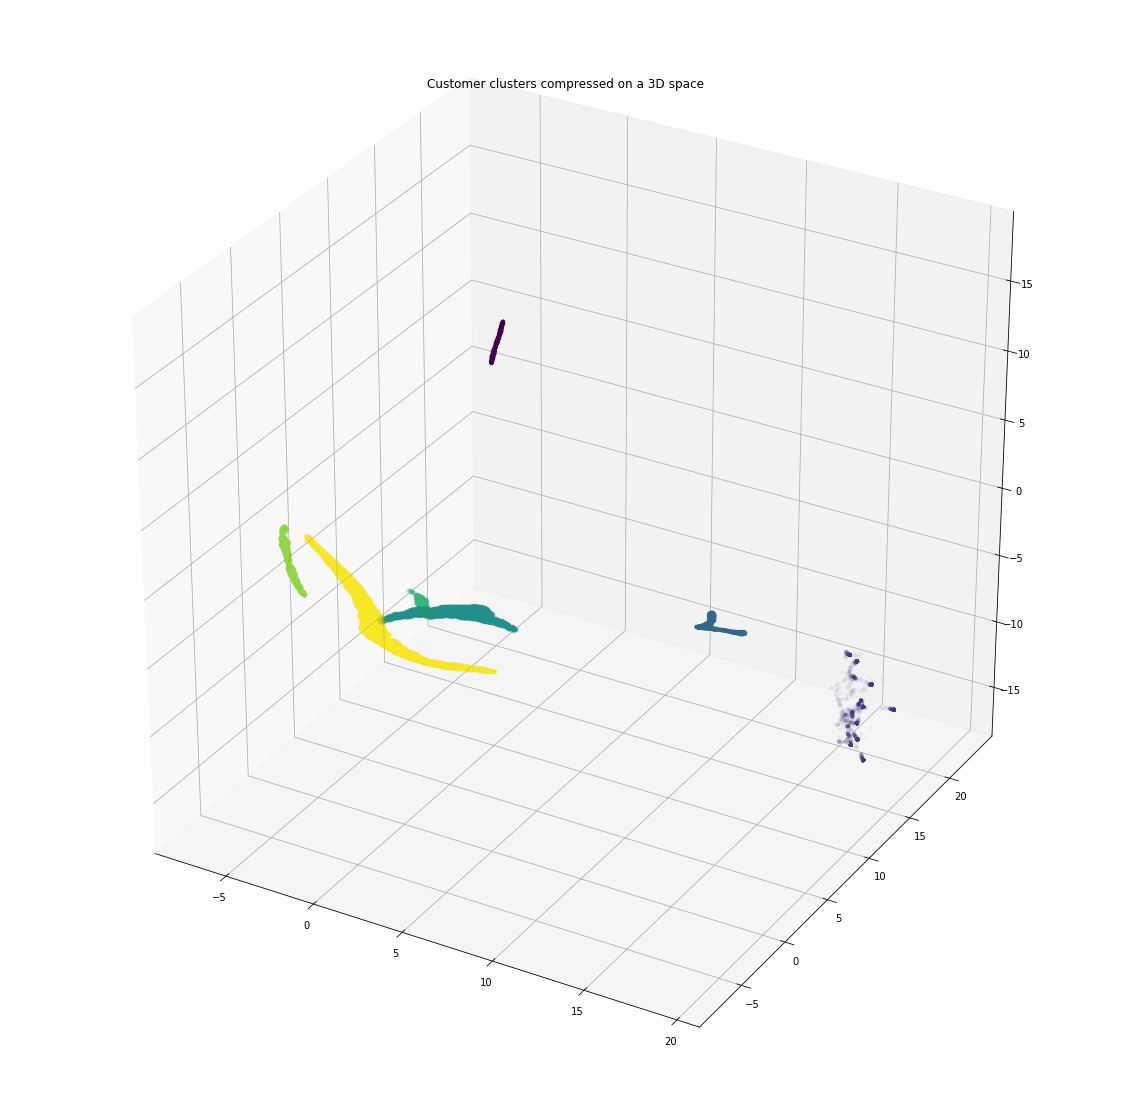

In [334]:
df_plot = df_aux.copy()
#df_plot = df_aux[df_aux.label.isin([2])]
#df_plot = df_aux[df_aux.label_probability<=0.9]
plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.scatter3D(df_plot['umap_dim_3'], 
             df_plot['umap_dim_2'], 
             df_plot['umap_dim_1'], 
             c=df_plot['label'], 
             s=10, 
             alpha=0.03, 
             label=df_plot['label'])
plt.title('Customer clusters compressed on a 3D space')
#legend = ax.legend(loc="lower left", title="Classes")
plt.show()

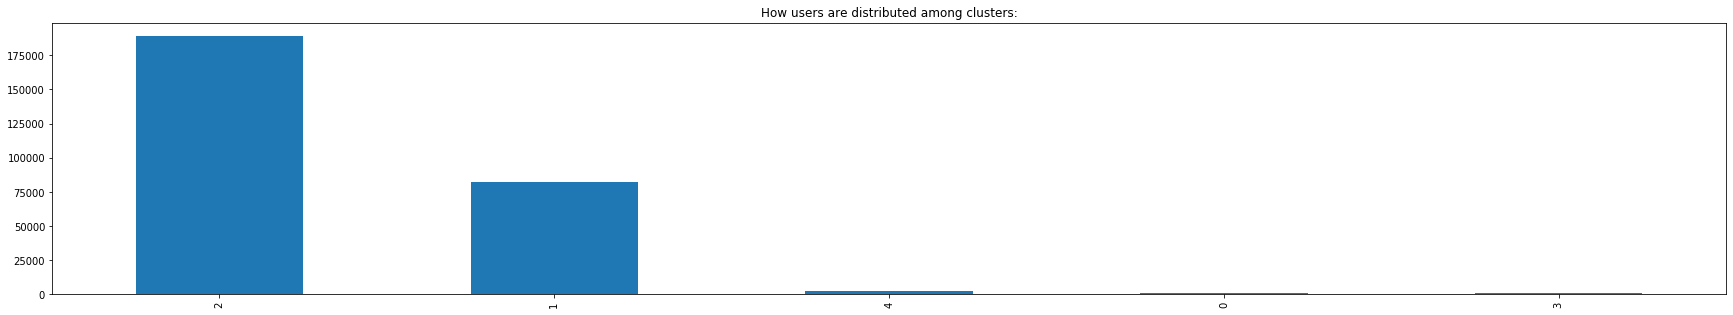

In [299]:
plt.figure(figsize=(30, 5))
plt.title('How users are distributed among clusters:')
pd.value_counts(df_aux['label_2'], normalize=False).plot.bar()
plt.show()

In [301]:
# Cluster of the big cluster
df_rent[df_rent.label_2==2].drop(columns=['label_2','label_probability_2']).head(2)

,umap_dim_1,umap_dim_2,umap_dim_3
Marketing_Cloud_Visitor_ID,,,
00000107708722978450827756473807907358,1.862862,-3.838513,3.362385
00000136845845092372076348413986631894,2.388601,-0.954339,1.747901
